<a href="https://colab.research.google.com/github/grammenoudis/NN-Project/blob/main/Copy_of_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [ ]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [ ]:
rows = 5
digits_per_row = 5

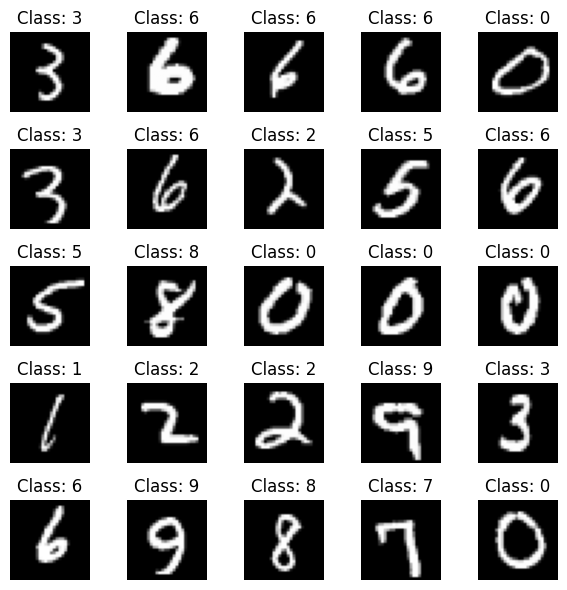

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [ ]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5419 - loss: 1.6484 - val_accuracy: 0.8368 - val_loss: 0.7738
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8361 - loss: 0.7213 - val_accuracy: 0.8681 - val_loss: 0.5446
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8651 - loss: 0.5428 - val_accuracy: 0.8843 - val_loss: 0.4592
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8787 - loss: 0.4688 - val_accuracy: 0.8907 - val_loss: 0.4140
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8864 - loss: 0.4271 - val_accuracy: 0.8961 - val_loss: 0.3854
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8927 - loss: 0.3998 - val_accuracy: 0.9018 - val_loss: 0.3655
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8964 - loss: 0.3802 - val_accuracy: 0.9054 - val_loss: 0.3505
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8997 - loss: 0.36

# Display Loss and Accuracy per Training Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

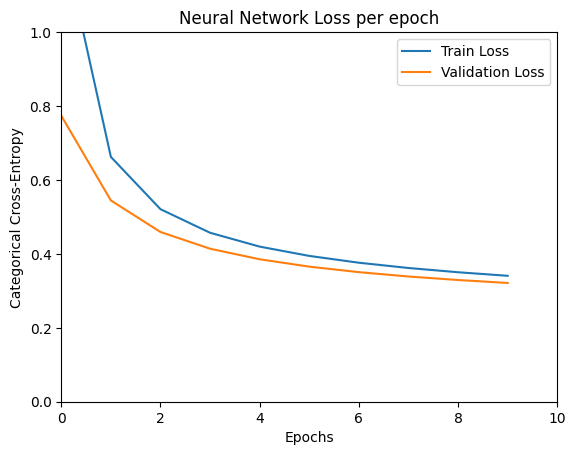

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

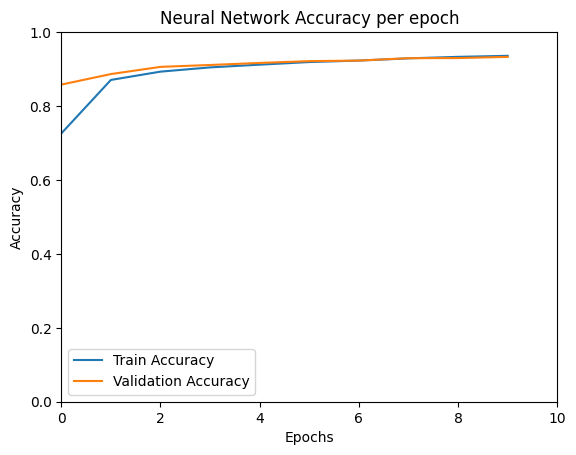

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


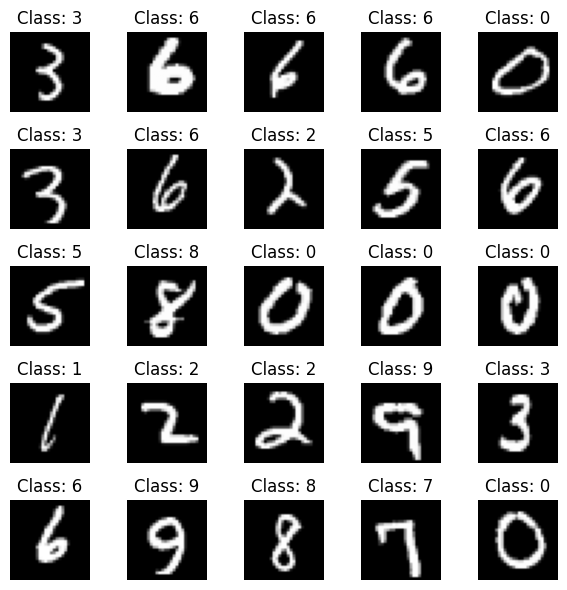

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,022,490 (3.90 MB)

 Trainable params: 1,022,490 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8008 - loss: 7.5371 - val_accuracy: 0.9309 - val_loss: 0.2581
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9038 - loss: 0.4406 - val_accuracy: 0.9474 - val_loss: 0.1820
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9256 - loss: 0.2895 - val_accuracy: 0.9543 - val_loss: 0.1628
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9378 - loss: 0.2325 - val_accuracy: 0.9582 - val_loss: 0.1459
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9455 - loss: 0.1956 - val_accuracy: 0.9626 - val_loss: 0.1351
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9499 - loss: 0.1766 - val_accuracy: 0.9632 - val_loss: 0.1289
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9569 - loss: 0.1526 - val_accuracy: 0.9659 - val_loss: 0.1201
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9606 -

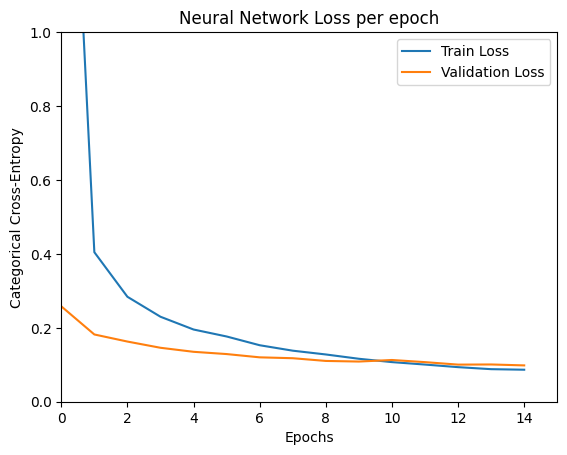

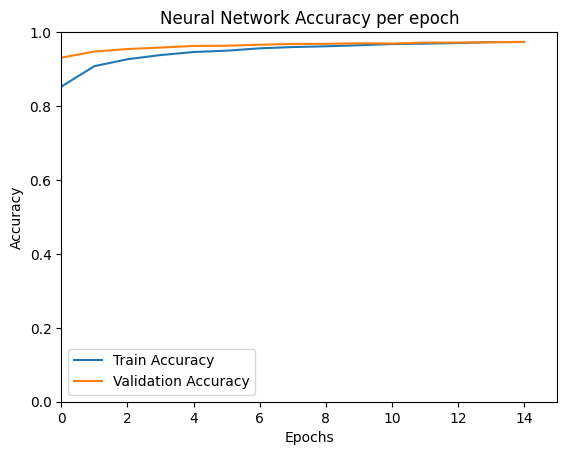

In [26]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

rows = 5
digits_per_row = 5

fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)



activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.0009
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 15


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=784, activation=activation, name='hidden-1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-2'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()


# ----------------Tuning Table---------------
#             (256 neurons per layer)
# original: learning rate: 0.001,  epochs: 10, activation: tanh, accuracy: 0.9095
# try #1  : learning rate: 0.0008, epochs: 10, activation: relu, accuracy: 0.9559
# try #2  : learning rate: 0.0007, epochs: 10, activation: relu, accuracy: 0.9503
# try #3  : learning rate: 0.0009, epochs: 10, activation: relu, accuracy: 0.9567 (this learning rate seems to perform the best at these config)
# try #4  : learning rate: 0.001,  epochs: 10, activation: relu, accuracy: 0.9546

#             (512 neurons per layer)
# try #1: learning rate: 0.0009,  epochs: 10, actiavtion: relu, accuracy: 0.9610
# try #2: learning rate: 0.0009,  epochs: 15, activation: relu, accuracy: 0.9627
# try #3: learning rate: 0.0009,  epochs: 15, activation: relu, accuracy: 0.9667 (added a dropout of 0.3)

#        (756 512 neurons with dual 0.2 dropout)
# try #1: learning rate: 0.0009,  epochs: 15, activation: relu, accuracy: 0.9736



# Ερωτηση 3)
# α) Τα δεδομενα της MNIST ειναι καλα μιας και ειναι ευκολα επεξεργασιμα, απλα (28χ28) και ασπρομαυρα

# β) Οχι, δεν ειναι ολα τα πιξελ χρησιμα μιας και καποια οπως στο φοντο δεν μεταδιδουν χρησιμη πληροφορια

# γ) Οταν εχουμε πολλα δεδομενα και το προβλημα που θελουμε να λυσουμε ειναι περιπλοκο και δεν λυνεται ευκολα με "απλους" αλγοριθμους

# δ) Ναι, μπορεί να χρησιμοποιηθει και στους 3 βασικους κλαδους της μηχανικης μάθησης

## 2. Validation: Show 1 misclassified digit from each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


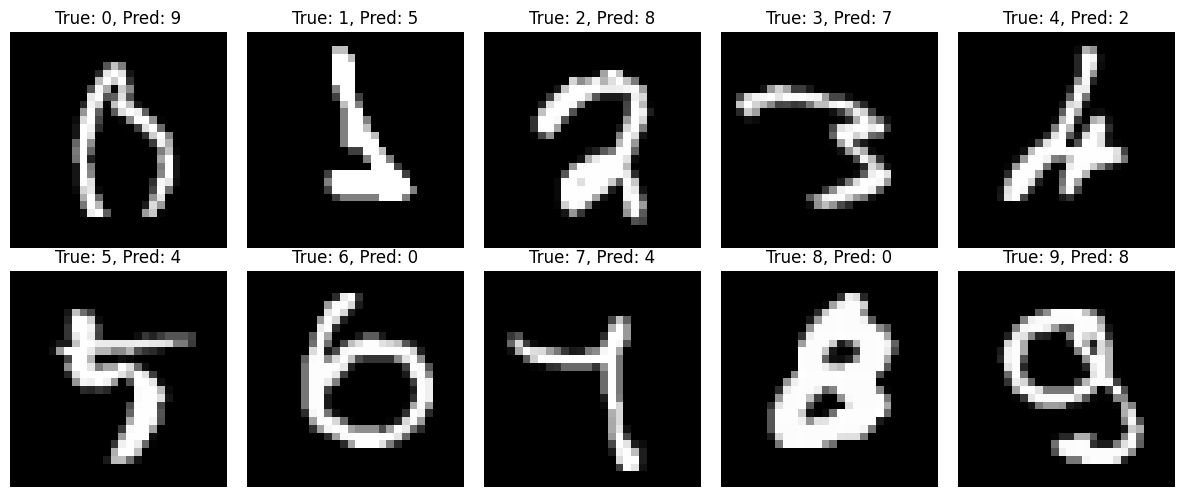

In [29]:
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

misclassified = {}
for i in range(len(true_labels)):
    true_label = true_labels[i]
    pred_label = pred_labels[i]
    if true_label != pred_label and true_label not in misclassified:
        misclassified[true_label] = i
    if len(misclassified) == 10:  #all classes
        break

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()
for digit in range(10):
    idx = misclassified.get(digit, None)
    if idx is not None:
        axes[digit].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axes[digit].set_title(f"True: {digit}, Pred: {pred_labels[idx]}")
    else:
        axes[digit].text(0.5, 0.5, "None", horizontalalignment='center', verticalalignment='center')
    axes[digit].axis('off')

plt.tight_layout()
plt.show()


## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

In [ ]:

#--------------Architecture Improvement----------------------
#   this is an improvement that can be made in the architecture to improve the accuracy significantly, boosting it up to 0.9870 using filters etc
#   model = tf.keras.Sequential([
#       tf.keras.layers.Reshape((28,28,1), input_shape=(784,)),
#       tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),
#       tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),
#       tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(128, activation='relu'),
#       tf.keras.layers.Dropout(0.3),
#       tf.keras.layers.Dense(10, activation='softmax')
#   ])

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [31]:
!pip show tensorflow
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>